<a href="https://colab.research.google.com/github/kavmuni/dateSciencePython/blob/main/Titanic_17082025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = sns.load_dataset('titanic')
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
type(titanic)

pandas.core.frame.DataFrame

In [4]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic.dropna(inplace=True)

In [6]:
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


In [7]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,0.675824,1.192308,35.623187,0.467033,0.478022,78.919735
std,0.469357,0.516411,15.671615,0.645007,0.755869,76.490774
min,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,1.000000,1.000000,47.750000,1.000000,1.000000,90.000000
max,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [8]:
for col in titanic.columns:
    print(col)

survived
pclass
sex
age
sibsp
parch
fare
embarked
class
who
adult_male
deck
embark_town
alive
alone


In [9]:
# this is to form a standardized value based on the central tendency
for col in ('age', 'fare'):
  print(col, titanic[col].mean(), titanic[col].std())
  col_z = (col+'_z')
  titanic.loc[:,col_z] = (titanic[col] - titanic[col].mean()) / titanic[col].std()
titanic.head(5)

age 35.62318681318681 15.6716153573797
fare 78.91973516483515 76.49077401159934


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_z,fare_z
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0.151664,-0.099835
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,-0.039765,-0.337554
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,1.172618,-0.353732
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False,-2.017864,-0.813428
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True,1.427856,-0.684654


<Axes: xlabel='age', ylabel='Count'>

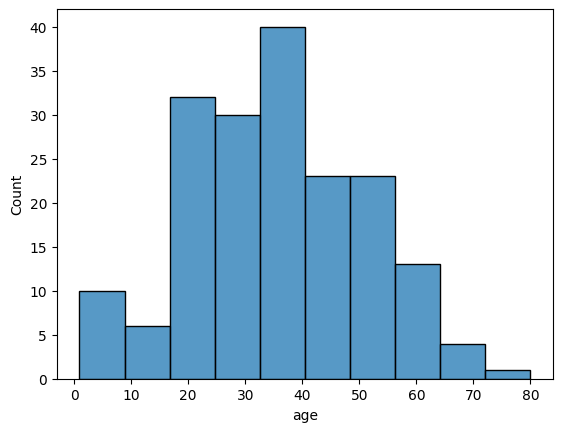

In [14]:
sns.histplot(titanic['age'].dropna())

<Axes: xlabel='age', ylabel='Count'>

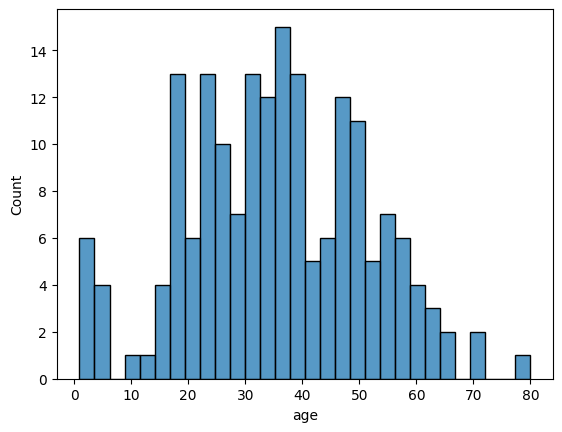

In [17]:
sns.histplot(titanic['age'].dropna(), bins = 30)

<Axes: xlabel='age_z', ylabel='Count'>

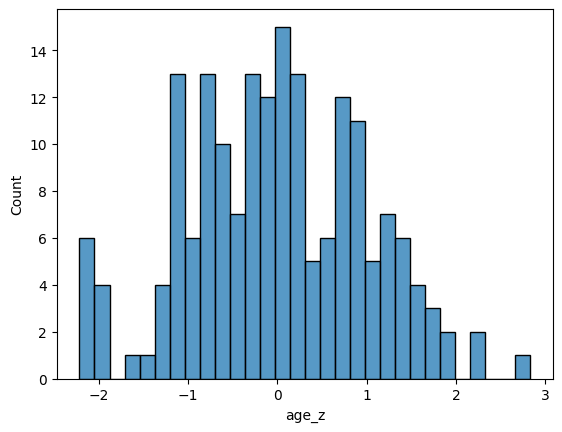

In [16]:
sns.histplot(titanic['age_z'].dropna(), bins = 30)

<Axes: xlabel='age_z', ylabel='Count'>

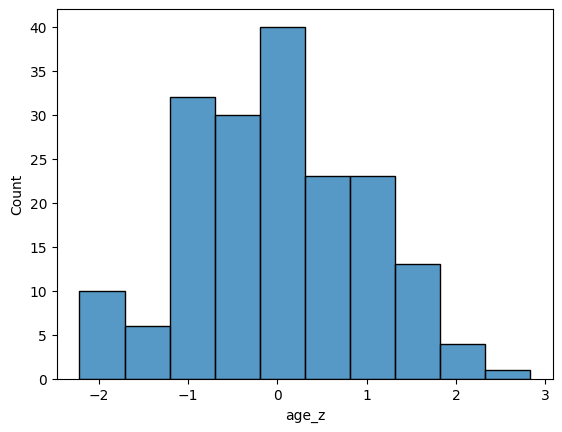

In [15]:
sns.histplot(titanic['age_z'].dropna())

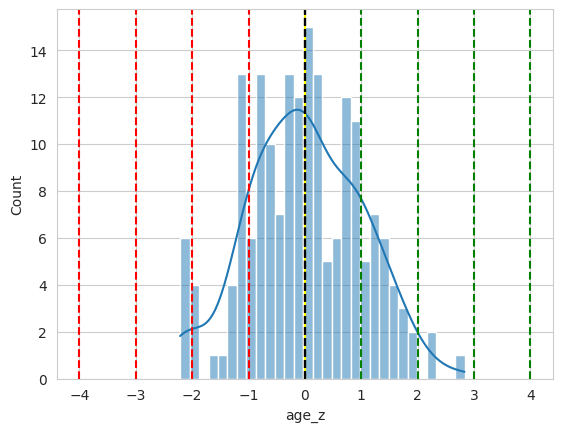

In [43]:
# Z - axis
z = titanic['age_z'].dropna()
fig, ax = plt.subplots()
sns.set_style('whitegrid')
sns.histplot(z, bins = 30, ax = ax, kde=True)
mean_value = np.mean(z)
std_01 = np.std(z)
plt.axvline(mean_value, color='yellow', linestyle='-')
plt.axvline(mean_value, color='yellow', linestyle='-')
for k in [1,2,3,4]: # this is the standard deviation which +/-
  ax.axvline(-k, linestyle = '--', color = 'red')
  ax.axvline(k, linestyle = '--', color = 'green')
  ax.axvline(0, linestyle = '--', color = 'black')
plt.show()

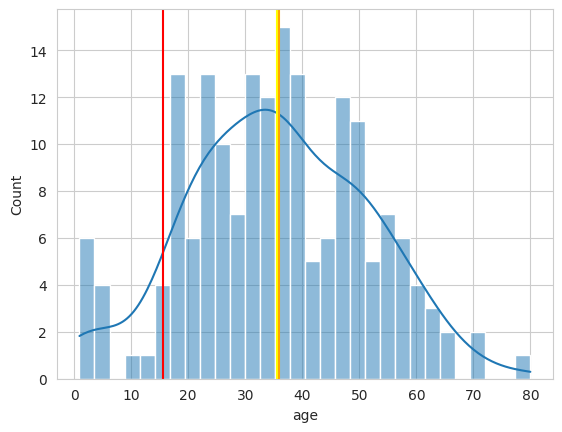

In [47]:
z = titanic['age'].dropna()
fig, ax = plt.subplots()
sns.set_style('darkgrid')
sns.histplot(z, bins = 30, ax = ax, kde=True)
mean_value = np.mean(z)
std_01 = np.std(z)
median_01=np.median(z)
plt.axvline(mean_value, color='yellow', linestyle='-')
plt.axvline(std_01, color='red', linestyle='-')
plt.axvline(median_01, color='orange', linestyle='-')
plt.show()

<Axes: xlabel='age', ylabel='Count'>

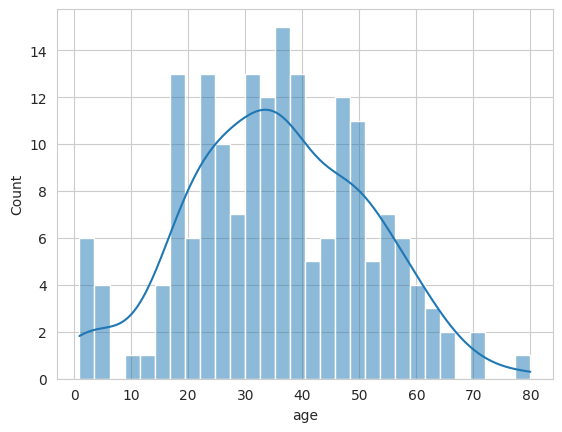

In [34]:
# Probability
sns.histplot(titanic['age'].dropna(), bins = 30, kde = True)